# Week 3 assigment - Zainab

Homework Guidelines: Building a Custom Neural Network for MNIST Digit Classification

In this homework assignment, you are tasked with understanding and possibly modifying a Python script that trains a neural network to classify handwritten digits from the MNIST dataset. The provided code uses TensorFlow and Keras. Your goal is to comprehend the code and potentially make some modifications as indicated.

1. Importing Libraries: Understand the initial part of the code where necessary libraries are imported. Ensure that you have TensorFlow and Keras installed in your environment.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split


2. Loading the MNIST Dataset: Observe how the MNIST dataset is loaded and divided into training and testing sets. The dataset consists of images and labels.


In [8]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

3. Data Preprocessing: Understand the normalization of pixel values to the range [0, 1]. This preprocessing step is essential for efficient model training.


In [9]:
train_images[1][5,:] #check one line from data

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [10]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [11]:
train_images[1][5,:] #check same line again

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18823529,
       0.93333333, 0.98823529, 0.98823529, 0.98823529, 0.92941176,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

4. One-Hot Encoding: Comprehend the one-hot encoding process applied to the labels. It converts class labels into a binary matrix representation. Ensure that you understand the purpose of this transformation.

In [12]:
# check label data type
unique_classes = np.unique(train_labels)
unique_classes 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
# check nuber of classes
num_classes = len(unique_classes)
num_classes

10

In [14]:
# One-hot encode the labels
train_labels = keras.utils.to_categorical(train_labels, 10)
tst_integers = test_labels # to save the labels as integers
test_labels =  keras.utils.to_categorical(test_labels, 10)

In [15]:
train_labels # check labels after one hot encoding

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

5. Custom Dense Layer: Examine the custom dense layer definition. This layer is used within the neural network architecture and allows you to specify the number of units and activation function.

    - Pay attention to how weights and biases are initialized in the build method.
    - Understand how the layer performs matrix multiplication and applies the activation function in the call method.


In [16]:
# custom dense layer
class zainabDenseLayer(keras.layers.Layer):
    def __init__(self, units, activation):
        super(zainabDenseLayer, self).__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        self.w = self.add_weight("weights", (input_shape[-1], self.units)) 
        self.b = self.add_weight("bias", (self.units,))

    def call(self, inputs):
        z = tf.matmul(inputs, self.w) + self.b
        return self.activation(z)

6. Neural Network Architecture: Analyze the definition of the neural network model. It consists of a series of layers, including custom dense layers with specified units and activation functions.

    - Identify the input shape for the first layer (28x28 for MNIST images).
    - Note the choice of activation functions (e.g., tf.nn.relu and tf.nn.softmax) for different layers.


In [17]:
# model creation with 2 layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # processing layer to make array 1D vector of size 28*28
    zainabDenseLayer(128, activation=tf.nn.relu), #1st layer with relu activation function
    zainabDenseLayer(10, activation=tf.nn.softmax) #2nd layer with softmax activation function
])

    
7. Custom Loss Function: Study the custom loss function custom_sparse_categorical_crossentropy. This function computes the loss based on the negative log probabilities.

    - Understand how the negative log probabilities are calculated.
    - Observe how the mean loss across the batch is computed.

In [18]:
# custom cross-entropy loss function using this equation:
# L(y_true, y_pred) = - (1 / N) * Σ [ Σ (y_true_i,j * log(y_pred_i,j)) ]
def custom_sparse_categorical_crossentropy(y_true, y_pred):
    loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=[1]))
    return loss

8. Custom Accuracy Metric: Examine the custom_accuracy function, which calculates accuracy as the percentage of correct predictions.

    - Pay attention to how it compares predicted and true labels to determine accuracy.


In [19]:
# custom accuracy, we need to compare y_true with y_predict
# then calculate accuracy = true predictions / total number of samples
def custom_accuracy(y_true, y_pred):
    correct_predictions = tf.equal(tf.argmax(y_true, 1), tf.argmax(y_pred, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    return accuracy

9. Model Compilation: Observe how the model is compiled using the Adam optimizer or other optimizer or you can write costum optimizer function, the custom loss function, and the custom accuracy metric.

    - Understand the significance of choosing appropriate optimizer and metrics for the task.


In [20]:
# compile model
model.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])

10. Model Training: Check the training process using the model.fit method. The model is trained for a specified number of epochs and with a given batch size.

In [21]:
# fit model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.2938 - custom_accuracy: 0.9176
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1310 - custom_accuracy: 0.9618
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0925 - custom_accuracy: 0.9729
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0688 - custom_accuracy: 0.9790
Epoch 5/5
938/938 [==============================] - 5s 6ms/step - loss: 0.0546 - custom_accuracy: 0.9835


11. Model Evaluation: Understand how the trained model is evaluated on the test dataset using the model.evaluate method. The test accuracy is printed as the result.



In [22]:
# evaluate 
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0799 - custom_accuracy: 0.9760
Test Accuracy: 97.60%
Test Loss: 0.0799


# Assignment Tasks (Optional):

# Model 1

- Experiment with different neural network architectures (e.g., changing the number of units, adding more layers, or trying different activation functions) to see how they affect model performance.

In [23]:
########## increase layers ###############
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # processing layes
    zainabDenseLayer(128, activation=tf.nn.relu), #1st layer with 128 size and relu activation function
    zainabDenseLayer(64, activation=tf.nn.relu),  #2nd layer with 64 size and relu activation function
    zainabDenseLayer(32, activation=tf.nn.relu),  #3rd layer with 32 size and relu activation function
    zainabDenseLayer(10, activation=tf.nn.softmax) #4th layer with softmax activation function
])
# compile model
model1.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])
# fit model
history1 = model1.fit(train_images, train_labels, epochs=5, batch_size=64)
# evaluate
test_loss1, test_accuracy1 = model1.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy1 * 100:.2f}%')
print(f'Test Loss: {test_loss1:.4f}')

Epoch 1/5
938/938 [==============================] - 9s 7ms/step - loss: 0.2982 - custom_accuracy: 0.9117
Epoch 2/5
938/938 [==============================] - 6s 6ms/step - loss: 0.1206 - custom_accuracy: 0.9632
Epoch 3/5
938/938 [==============================] - 6s 6ms/step - loss: 0.0852 - custom_accuracy: 0.9742
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0649 - custom_accuracy: 0.9793
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0878 - custom_accuracy: 0.9742
Test Accuracy: 97.42%
Test Loss: 0.0878


In [24]:
########### use different activation functions #################
model11 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),     #processing
    zainabDenseLayer(128, activation=tf.nn.sigmoid),#1st layer with 128 size and sigmoid activation function 
    zainabDenseLayer(10, activation=tf.nn.softmax)  #2nd layer with softmax activation function
])
#compile model
model11.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])
# fit model
history11 = model11.fit(train_images, train_labels, epochs=5, batch_size=64)
# evaluate model
test_loss11, test_accuracy11 = model11.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy11 * 100:.2f}%')
print(f'Test Loss: {test_loss11:.4f}')

Epoch 1/5
938/938 [==============================] - 8s 6ms/step - loss: 0.4857 - custom_accuracy: 0.8791
Epoch 2/5
938/938 [==============================] - 5s 6ms/step - loss: 0.2364 - custom_accuracy: 0.9328
Epoch 3/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1814 - custom_accuracy: 0.9483
Epoch 4/5
938/938 [==============================] - 5s 6ms/step - loss: 0.1462 - custom_accuracy: 0.9588
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1210 - custom_accuracy: 0.9640
Test Accuracy: 96.40%
Test Loss: 0.1210


# Model 2

- Implement your custom loss function or metric and evaluate its impact on model training and performance.

In [25]:
# Custom Mean Squared Error Loss Function
def custom_mean_squared_error(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [26]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #processing layer
    zainabDenseLayer(128, activation=tf.nn.relu), #1st layer with 128 size and relu activation function 
    zainabDenseLayer(10, activation=tf.nn.softmax) #2nd layer with softmax activation function
])
# compile model
model2.compile(optimizer='adam',
              loss=custom_mean_squared_error,
              metrics=[custom_accuracy])
# fit model
history2 = model2.fit(train_images, train_labels, epochs=5, batch_size=64)
# evaluate model
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy2 * 100:.2f}%')
print(f'Test Loss: {test_loss2:.4f}')

Epoch 1/5
938/938 [==============================] - 7s 5ms/step - loss: 0.0136 - custom_accuracy: 0.9128
Epoch 2/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0066 - custom_accuracy: 0.9586
Epoch 3/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0049 - custom_accuracy: 0.9702
Epoch 4/5
938/938 [==============================] - 5s 5ms/step - loss: 0.0038 - custom_accuracy: 0.9767
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0041 - custom_accuracy: 0.9738
Test Accuracy: 97.38%
Test Loss: 0.0041


# Model 3

- If you have a larger dataset, consider adapting this code to work with it by adjusting the input shape and the number of output units.

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
#assume that we want to minimize data to 10000

In [30]:
(images, labels), (_, _) = mnist.load_data() # upload data
total_samples = images.shape[0]  #total sample
#take random data
np.random.seed(42) 
random_indices = np.random.choice(total_samples, 10000, replace=False) #10000 samples

# create new subset
subset_images = images[random_indices]
subset_labels = labels[random_indices]

# Split subset 80/20 train/test
train_images3, test_images3, train_labels3, test_labels3 = train_test_split(
    subset_images, subset_labels, test_size=0.2, random_state=42)

print("total samples", total_samples)
print("subset samples", (subset_images.shape[0]))

total samples 60000
subset samples 10000


In [31]:
# normalization
train_images3, test_images3 = train_images3 / 255.0, test_images3 / 255.0
# One-hot encode the labels
train_labels3 = keras.utils.to_categorical(train_labels3, 10)
test_integers3 = test_labels3 # save the original classes before encoding
test_labels3 =  keras.utils.to_categorical(test_labels3, 10)

In [32]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  #processing
    zainabDenseLayer(128, activation=tf.nn.relu), #1st layer with 128 size and relu activation function 
    zainabDenseLayer(10, activation=tf.nn.softmax) #2nd layer with softmax activation function
])
#compile model
model3.compile(optimizer='adam',
              loss=custom_sparse_categorical_crossentropy,
              metrics=[custom_accuracy])
#fit model
history3 = model3.fit(train_images3, train_labels3, epochs=5, batch_size=64)
# evaluate model
test_loss3, test_accuracy3 = model3.evaluate(test_images3, test_labels3)
print(f'Test Accuracy: {test_accuracy3 * 100:.2f}%')
print(f'Test Loss: {test_loss3:.4f}')

Epoch 1/5
125/125 [==============================] - 2s 5ms/step - loss: 0.6989 - custom_accuracy: 0.8104
Epoch 2/5
125/125 [==============================] - 1s 5ms/step - loss: 0.3069 - custom_accuracy: 0.9120
Epoch 3/5
125/125 [==============================] - 1s 5ms/step - loss: 0.2392 - custom_accuracy: 0.9339
Epoch 4/5
125/125 [==============================] - 1s 6ms/step - loss: 0.1982 - custom_accuracy: 0.9431
Epoch 5/5
63/63 [==============================] - 1s 3ms/step - loss: 0.2075 - custom_accuracy: 0.9375
Test Accuracy: 93.75%
Test Loss: 0.2075


# Visualization

- Explore ways to visualize the model's predictions or intermediate layer activations to gain insights into its behavior.

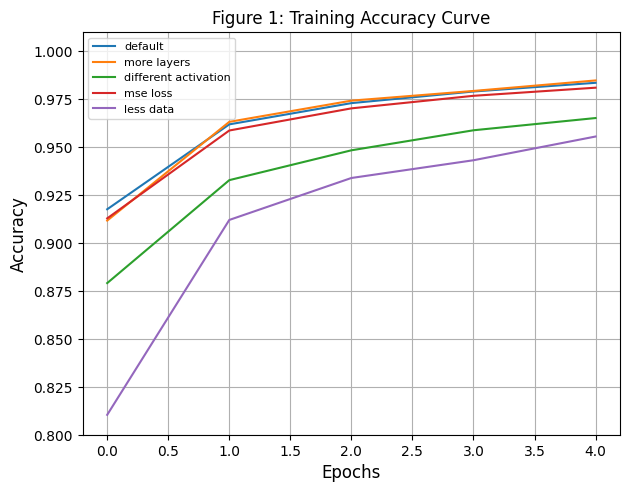

In [33]:
#accuracy
plt.plot(history.epoch, history.history['custom_accuracy'],  label='default') 
plt.plot(history1.epoch, history1.history['custom_accuracy'],  label='more layers')  
plt.plot(history11.epoch, history11.history['custom_accuracy'],  label='different activation') 
plt.plot(history2.epoch, history2.history['custom_accuracy'],  label='mse loss')  
plt.plot(history3.epoch, history3.history['custom_accuracy'],  label='less data')  

plt.legend(fontsize=8)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.8, 1.01)  
plt.grid()
plt.tight_layout()
plt.title("Figure 1: Training Accuracy Curve")
plt.show()

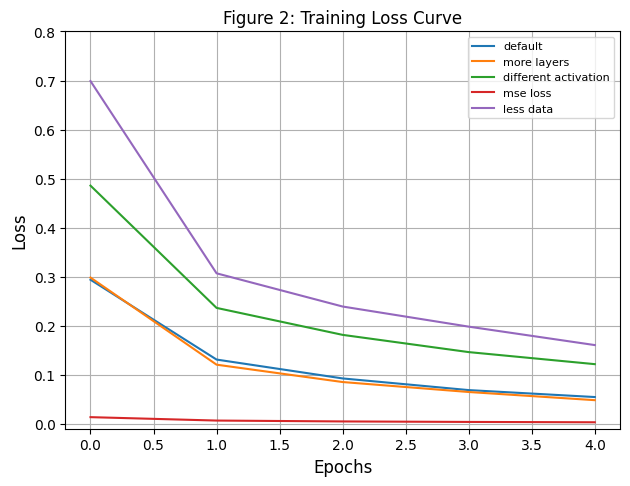

In [34]:
#loss
plt.plot(history.epoch, history.history['loss'],  label='default') 
plt.plot(history1.epoch, history1.history['loss'],  label='more layers')  
plt.plot(history11.epoch, history11.history['loss'],  label='different activation') 
plt.plot(history2.epoch, history2.history['loss'],  label='mse loss')  
plt.plot(history3.epoch, history3.history['loss'],  label='less data')  

plt.legend(fontsize=8)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.ylim(-0.01 , 0.8)
plt.grid()
plt.tight_layout()
plt.title("Figure 2: Training Loss Curve")
plt.show()

63/63 [==============================] - 0s 3ms/step


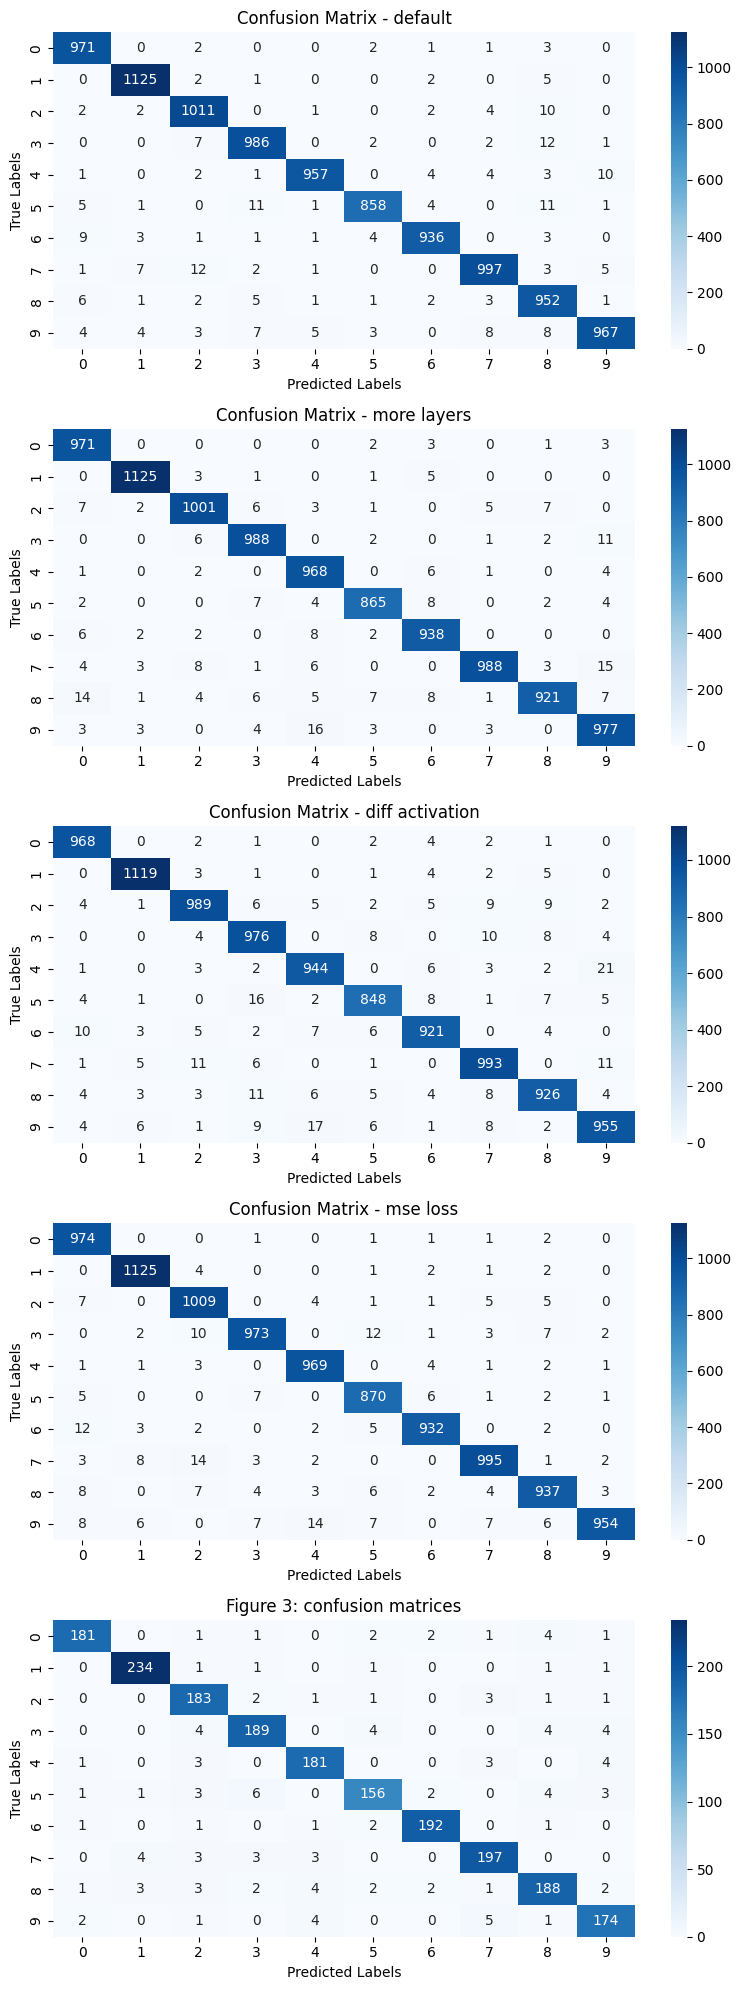

In [35]:
model_names = ['default', 'more layers', 'diff activation', 'mse loss', 'less data'] #models names

# predicted probabilities for each model
predicted_probabilities1 = model.predict(test_images)
predicted_probabilities2 = model1.predict(test_images)
predicted_probabilities3 = model11.predict(test_images)
predicted_probabilities4 = model2.predict(test_images)
predicted_probabilities5 = model3.predict(test_images3)

# true labels for each model
true_labels1, true_labels2, true_labels3, true_labels4, true_labels5 = tst_integers, tst_integers, tst_integers, tst_integers, test_integers3

# predicted labels for each model
predicted_labels_model1 = np.argmax(predicted_probabilities1, axis=1)
predicted_labels_model2 = np.argmax(predicted_probabilities2, axis=1)
predicted_labels_model3 = np.argmax(predicted_probabilities3, axis=1)
predicted_labels_model4 = np.argmax(predicted_probabilities4, axis=1)
predicted_labels_model5 = np.argmax(predicted_probabilities5, axis=1)

# subplots 5x1 
fig, axes = plt.subplots(5, 1, figsize=(8,20))

# Calculate and plot confusion matrix for each model
for i, model_name in enumerate(model_names):
    ax = axes[i]
    true_labels = globals()[f'true_labels{i+1}']
    predicted_labels = globals()[f'predicted_labels_model{i+1}']

    # get confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # plot the confusion matrix 
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
plt.title('Figure 3: confusion matrices')
plt.tight_layout() # Adjust the layout
plt.show()


# Notes

- As we can see in figure 1 the model with more layers get the highest accuracy of 97.42%
- model with less data gives the lowest accuracy of 93.75%
- when using sigmoid activation function it give less accuracy comparing with relu 
- when we change the loss function to MSE it gives less accuracy than using entropy loss

- in figure 2 model with MSE loss gives the less losswhile the model with less data gives the highest loss

- in figure 3 confusion matrix for each model explain and visualize the difrences of predicting the class 